In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv("game data.csv")
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [2]:
df = df.drop('Days', axis=1)

In [3]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
df['Outlook'] = le.fit_transform(df['Outlook'])

In [6]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,1,Cold,Indoor,No
1,0,Cold,Indoor,Yes
2,0,Warm,Outdoor,No
3,1,Cold,Outdoor,Yes
4,0,Cold,Outdoor,Yes


In [7]:
df['Temprature'] = le.fit_transform(df['Temprature'])
df['Routine'] = le.fit_transform(df['Routine'])
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,1,0,0,No
1,0,0,0,Yes
2,0,1,1,No
3,1,0,1,Yes
4,0,0,1,Yes


In [8]:
x = df.drop('Wear Jacket?', axis=1)

In [9]:
y = df['Wear Jacket?']

In [10]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [11]:
y.head()

0     No
1    Yes
2     No
3    Yes
4    Yes
Name: Wear Jacket?, dtype: object

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier() #shift + tab

In [13]:
clf.fit(x,y)

DecisionTreeClassifier()

In [14]:
clf.predict([[1,0,0]]) # sunny=1, cloudy=0  ; cold=0, warm=1 ; indoor=0, outdoor=1

C:\Users\Study Mart\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [15]:
clf.predict([[1,1,0]]) 

C:\Users\Study Mart\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [16]:
clf.predict([[1,0,1]])

C:\Users\Study Mart\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

In [21]:
x.columns

Index(['Outlook', 'Temprature', 'Routine'], dtype='object')

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

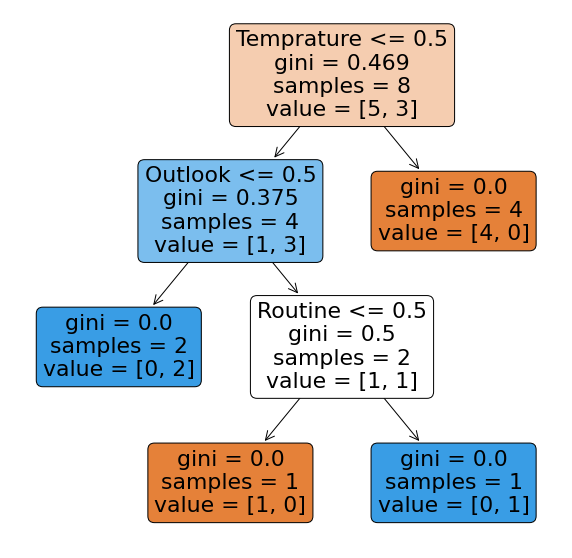

In [22]:
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True, rounded=True, feature_names=x.columns)

In [23]:
tree.export_text(clf)

'|--- feature_1 <= 0.50\n|   |--- feature_0 <= 0.50\n|   |   |--- class: Yes\n|   |--- feature_0 >  0.50\n|   |   |--- feature_2 <= 0.50\n|   |   |   |--- class: No\n|   |   |--- feature_2 >  0.50\n|   |   |   |--- class: Yes\n|--- feature_1 >  0.50\n|   |--- class: No\n'

In [24]:
print(tree.export_text(clf))

|--- feature_1 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- class: Yes
|   |--- feature_0 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: No
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: Yes
|--- feature_1 >  0.50
|   |--- class: No

